In [6]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2 as cv2
import math

In [7]:
from glob import glob
import numpy as np
import PIL
from pathlib import Path
import imagesize
import pathlib

In [117]:
train_data_path = "/Users/suryashukla/Documents/Projects/currency notes classifier/archive/new/Train"


In [118]:
dict = {
    0: '2hundred',
    1:'hundred',
    2:'2thousand',
    3:'fifty',
    4:'twenty',
    5:'ten',
    6:'5hundred'
  }

In [9]:
def data_preprocessing(path,height):
  data_dir = pathlib.Path(path)
  currency_images_dict = {
      'hundred': list(data_dir.glob('hundred/*')),
      '2hundred': list(data_dir.glob('2hundred/*')),
      'twenty': list(data_dir.glob('twenty/*')),
      'fifty': list(data_dir.glob('fifty/*')),
      'ten': list(data_dir.glob('ten/*')),
      '5hundred': list(data_dir.glob('5hundred/*')),
      '2thousand': list(data_dir.glob('2thousand/*')),
  }
  total=0
  for i in currency_images_dict:
    print(len(currency_images_dict[i]))
    total=total+len(currency_images_dict[i])
  print(total)
  currency_labels_dict = {
    '2hundred': 0,
    'hundred': 1,
    '2thousand': 2,
    'fifty': 3,
    'twenty': 4,
    'ten':5,
    '5hundred':6
  }
  imgs = []
  for i in currency_images_dict:
    for j in range(0,len(currency_images_dict[i])):
      imgs.append(currency_images_dict[i][j])
  img_meta = {}
  for f in imgs: 
    temp = cv2.imread(str(f))
    img_meta[str(f)] = temp.shape

  df = pd.DataFrame.from_dict(img_meta,orient='index')

  # df.columns = ['height','width','channel']
  # df = df.drop(['channel'],axis=1)
  # df['Aspect Ratio']=round(df['width']/df['height'],2)
  # fig = plt.figure(figsize=(8, 8))
  # ax = fig.add_subplot(111)
  # points = ax.scatter(df.width, df.height, color='blue', alpha=0.5, s=df["Aspect Ratio"]*100, picker=True)
  # ax.set_title("Image Resolution")
  # ax.set_xlabel("Width", size=14)
  # ax.set_ylabel("Height", size=14)
  # avg_aspect_ratio=0
  # for i in df['Aspect Ratio']:
  #   avg_aspect_ratio+=i
  # avg_aspect_ratio/=len(df)

  x, y = [], []

  # width=round(avg_aspect_ratio*height)
  # Image_shape=(width,height)
  for currency,images in currency_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(currency_labels_dict[currency])
  x=np.array(x)
  y=np.array(y)
  return x,y

  

In [119]:

x_train,y_train=data_preprocessing(train_data_path,200)

94
86
80
82
90
96
88
616


In [11]:
len(x_train)

616

(224, 224, 3)


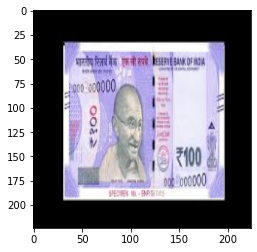

In [12]:
plt.figure()
img=cv2.cvtColor(x_train[50], cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [13]:
x_train_scaled=x_train/256
x_train_scaled

array([[[[0.9296875 , 0.89453125, 0.890625  ],
         [0.984375  , 0.9765625 , 0.97265625],
         [0.984375  , 0.9765625 , 0.9765625 ],
         ...,
         [0.85546875, 0.7578125 , 0.78125   ],
         [0.87109375, 0.76953125, 0.79296875],
         [0.859375  , 0.75390625, 0.7734375 ]],

        [[0.96484375, 0.92578125, 0.92578125],
         [0.98828125, 0.9765625 , 0.97265625],
         [0.98046875, 0.9765625 , 0.97265625],
         ...,
         [0.87109375, 0.765625  , 0.7890625 ],
         [0.859375  , 0.765625  , 0.78515625],
         [0.8515625 , 0.7421875 , 0.76171875]],

        [[0.9453125 , 0.9140625 , 0.9140625 ],
         [0.984375  , 0.97265625, 0.97265625],
         [0.9765625 , 0.98046875, 0.97265625],
         ...,
         [0.875     , 0.78515625, 0.8046875 ],
         [0.91015625, 0.82421875, 0.84375   ],
         [0.90234375, 0.83203125, 0.84765625]],

        ...,

        [[0.9375    , 0.9296875 , 0.9296875 ],
         [0.9765625 , 0.98046875, 0.98046875]

In [14]:

data_augmentation = models.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("vertical",input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(factor=(-0.2*math.pi,0.2*math.pi),input_shape=(224,224,3)),
    tf.keras.layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2), fill_mode='reflect',interpolation='bilinear', 
    seed=None, fill_value=0.0),
    tf.keras.layers.RandomCrop(224, 224),
    layers.experimental.preprocessing.RandomContrast(0.2),
  ]
)

In [15]:
# num_classes = 7

# model = models.Sequential([
#   data_augmentation,
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
              
# model.fit(x_train, y_train, epochs=15)  

In [16]:
# x_test,y_test = data_preprocessing('/Users/suryashukla/Documents/Projects/currency notes classifier/archive/Test',200)
# x_test=x_test/256
# model.evaluate(x_test,y_test)

In [17]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [18]:

import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [19]:
num_of_classes = 7

model = tf.keras.Sequential([
  data_augmentation,
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

summary = model.fit(x_train_scaled, y_train, epochs=2)

Epoch 1/2
20/20 [==============================] - 13s 557ms/step - loss: 0.3136 - acc: 0.8945
Epoch 2/2
20/20 [==============================] - 11s 547ms/step - loss: 0.3071 - acc: 0.9107


In [110]:
x_test,y_test = data_preprocessing('/Users/suryashukla/Documents/Projects/currency notes classifier/archive/new/Test',200)
x_test_scaled=x_test/256
model.evaluate(x_test_scaled,y_test)

30
27
30
27
29
27
27
197
7/7 [==============================] - 3s 452ms/step - loss: 0.4504 - acc: 0.8477


[0.4504473805427551, 0.8477157354354858]

In [120]:
x_test_scaled.shape

(197, 224, 224, 3)

In [125]:
testing=50

In [126]:
np.array([x_test_scaled[testing]]).shape


(1, 224, 224, 3)

In [127]:

prediction = np.argmax(model.predict(np.array([x_test_scaled[testing]])))

In [128]:
dict[prediction]

'2hundred'

(224, 224, 3)


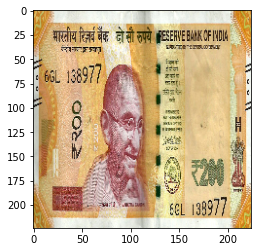

In [129]:
plt.figure()
img=cv2.cvtColor(x_test[testing], cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [132]:
model.save("currencyClassifier.h5")

In [136]:
from tensorflow import keras
load_model = keras.models.load_model(("currencyClassifier.h5"),custom_objects={'KerasLayer':hub.KerasLayer})

In [137]:
prediction = np.argmax(load_model.predict(np.array([x_test_scaled[testing]])))
dict[prediction]

'2hundred'

In [138]:
convertor = tf.lite.TFLiteConverter.from_keras_model(load_model)
tflite_model= convertor.convert()

In [139]:
with open('model.tflite','wb') as f:
  f.write(tflite_model)

In [140]:
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()


In [149]:
testLite= np.array([x_test_scaled[testing]],dtype="float32")
testLite.shape

(1, 224, 224, 3)

In [152]:
testLite.astype('f')

array([[[[0.24609375, 0.609375  , 0.76953125],
         [0.1875    , 0.515625  , 0.78125   ],
         [0.24609375, 0.6171875 , 0.828125  ],
         ...,
         [0.37890625, 0.7421875 , 0.875     ],
         [0.2890625 , 0.65625   , 0.82421875],
         [0.25390625, 0.5234375 , 0.75      ]],

        [[0.12890625, 0.5       , 0.73828125],
         [0.15625   , 0.49609375, 0.796875  ],
         [0.27734375, 0.671875  , 0.85546875],
         ...,
         [0.328125  , 0.71484375, 0.890625  ],
         [0.2890625 , 0.6796875 , 0.875     ],
         [0.16796875, 0.51953125, 0.80078125]],

        [[0.140625  , 0.4921875 , 0.7890625 ],
         [0.171875  , 0.5       , 0.78125   ],
         [0.31640625, 0.703125  , 0.8515625 ],
         ...,
         [0.33984375, 0.6953125 , 0.859375  ],
         [0.3359375 , 0.6953125 , 0.87890625],
         [0.1953125 , 0.54296875, 0.83203125]],

        ...,

        [[0.25390625, 0.55078125, 0.76171875],
         [0.40625   , 0.6796875 , 0.83203125]

In [154]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], testLite)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[-2.9258318 -4.3188615 -7.46652   -4.8713107 -7.7982807 -6.637774
  -6.1944675]]


In [155]:
dict[np.argmax(output_data)]

'2hundred'